# EJ OBLIGATORIO - SUPPORT VECTOR MACHINE (SVM)

In [200]:
#librerías
import sklearn.svm as svm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Clasificación SVM con Kernel Gaussiano

c:\Users\solek\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


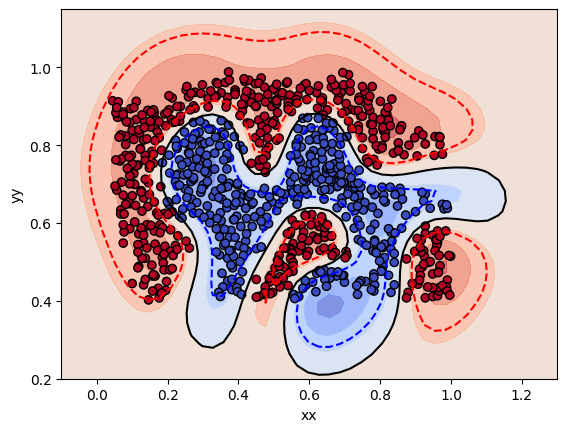

In [201]:
df = pd.read_pickle("ejs_svm.pkl") #Dataset original
# print(type(df))
# print(df.keys())

df=df['2do Dataset'] #Se extrae el segundo dataset
# print(df.keys())
X= df['X']
Y= df['y']

# classes = np.unique(Y)
# print('clases =', classes) #Para identificar las clases posibles

C=1
gamma = 50
classifier = svm.SVC(C=C, kernel = 'rbf', gamma = gamma)

classifier.fit(X,Y)

#Se genera la grilla para el gráfico 2D (xx,yy)
N=100
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1,  X[:,0].max()+1, N),   #Lista de valores de X[:,0], con N puntos para la grilla xx
                     np.linspace(X[:,1].min()-1, X[:,1].max()+1, N)     #Lista de valores de X[:,1], con N puntos para la grilla yy
                     )

#Se aplanan las matrices de la grilla a un vector 1D cada una y se concatenan para obtener la frontera de decisión
#además de las curvas de los vectores de soporte
Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
zz= Z.reshape(xx.shape) #Se ajusta el tamaño al de las grillas

#Se colorean las zonas según la clasificación en cada punto (zz)
plt.contourf(xx, yy, zz, alpha=0.7, cmap=plt.cm.coolwarm)
#Se grafican los puntos en el plano con un color distinto para cada clase
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.coolwarm, edgecolor='k') 
#Se grafica la frontera de decisión para que quede más nítida la diferencia
plt.contour(xx, yy, zz,levels=[-1, 0, 1], colors=['blue', 'black', 'red'], linestyles=['--', '-', '--'])
plt.xlabel('xx')
plt.ylabel('yy')
plt.xlim(-0.1,1.3)
plt.ylim(0.2,1.15)
plt.show()

### Se repiten los gráficos previos para distintos valores de C

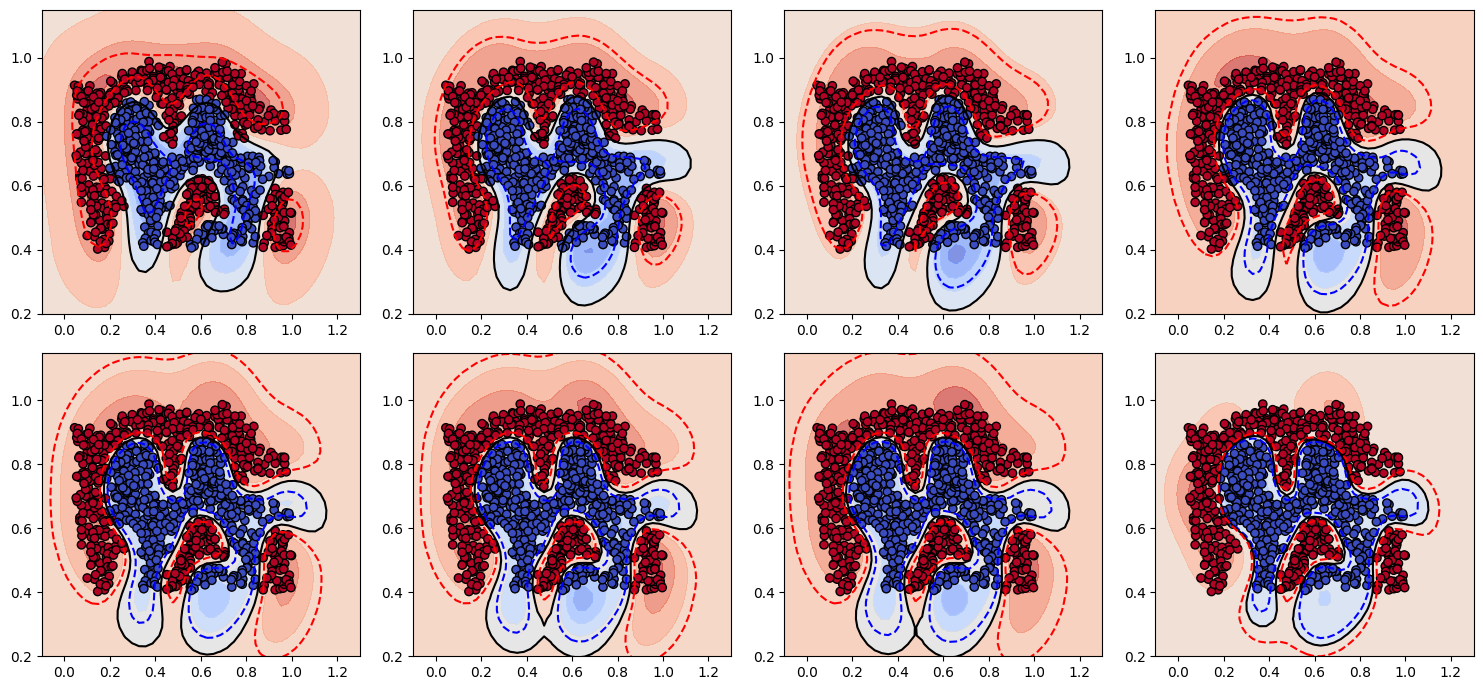

In [202]:
plt.figure(figsize=(15,7))
values_C = [0.1,0.5,1,5,10,15,20,500]
for i,C in enumerate(values_C,start = 1):
    gamma = 50
    classifier = svm.SVC(C=C, kernel = 'rbf', gamma = gamma)

    classifier.fit(X,Y.ravel()) #Se aplana Y para evitar el warning por ser vector columna

    #Se genera la grilla para el gráfico 2D (xx,yy)
    N=100
    xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1,  X[:,0].max()+1, N),   #Lista de valores de X[:,0], con N puntos para la grilla xx
                        np.linspace(X[:,1].min()-1, X[:,1].max()+1, N)     #Lista de valores de X[:,1], con N puntos para la grilla yy
                        )

    #Se aplanan las matrices de la grilla a un vector 1D cada una y se concatenan para obtener la frontera de decisión
    #además de las curvas de los vectores de soporte
    Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
    zz= Z.reshape(xx.shape) #Se ajusta el tamaño al de las grillas
    
    plt.subplot(2,4,i)
    #Se colorean las zonas según la clasificación en cada punto (zz)
    plt.contourf(xx, yy, zz, alpha=0.7, cmap=plt.cm.coolwarm)
    #Se grafican los puntos en el plano con un color distinto para cada clase
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.coolwarm, edgecolor='k') 
    #Se grafica la frontera de decisión para que quede más nítida la diferencia
    plt.contour(xx, yy, zz,levels=[-1, 0, 1], colors=['blue', 'black', 'red'], linestyles=['--', '-', '--'])
    # plt.xlabel('xx')
    # plt.ylabel('yy')
    plt.xlim(-0.1,1.3)
    plt.ylim(0.2,1.15)
plt.tight_layout()
plt.show()

A medida que aumenta el valor de C, las fronteras de decisión y las curvas de los vectores de soporte comienzan a solaparse. Al estar tan cerca los datos de la frontera de decisión, un pequeño cambio en ellos puede provocar que se desplacen hacia el otro lado de la misma, generando menor precisión en la predicción. El modelo es poco general, existe un overfitting.

### Se repiten los gráficos para distintos valores de Gamma

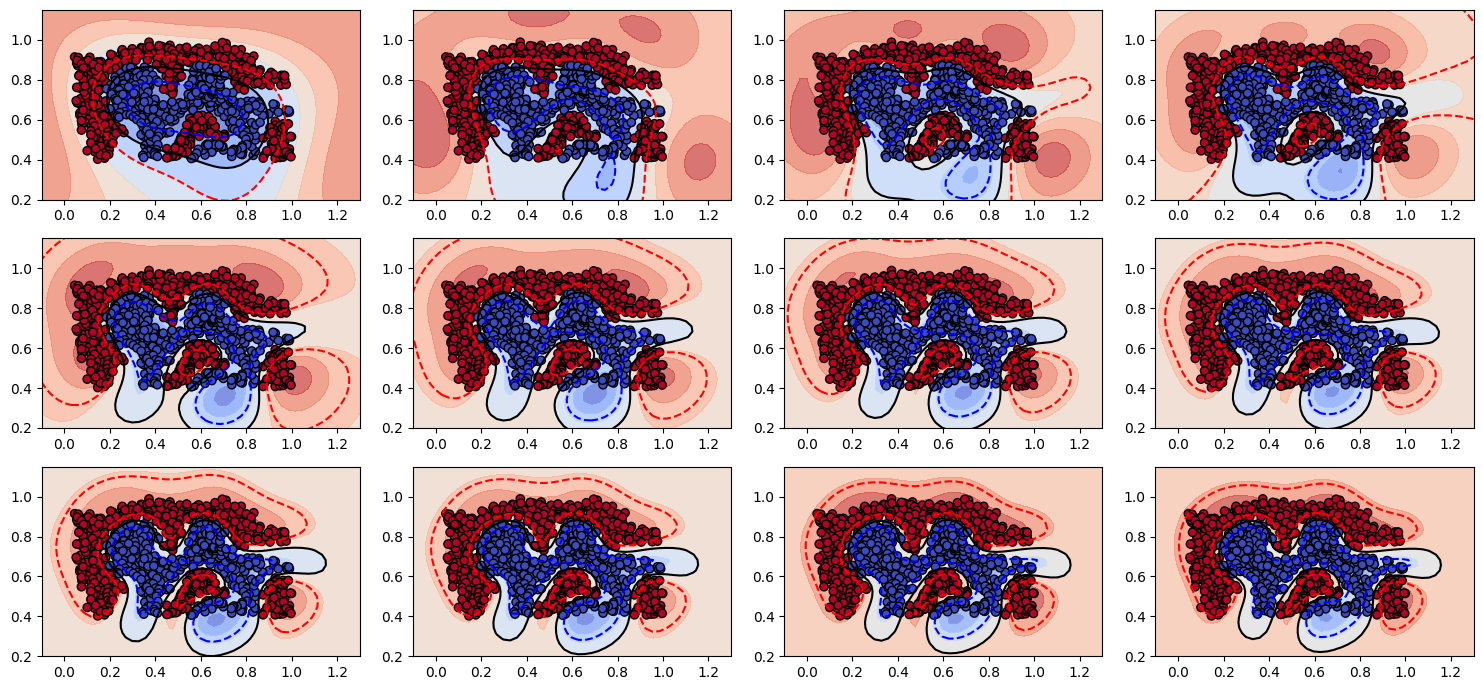

In [203]:
plt.figure(figsize=(15,7))
values_gamma = [5,10,15,20,25,30,35,40,45,50,55,60]
for i,gamma in enumerate(values_gamma,start = 1):
    C=1
    classifier = svm.SVC(C=C, kernel = 'rbf', gamma = gamma)

    classifier.fit(X,Y.ravel()) #Se aplana Y para evitar el warning por ser vector columna

    #Se genera la grilla para el gráfico 2D (xx,yy)
    N=100
    xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1,  X[:,0].max()+1, N),   #Lista de valores de X[:,0], con N puntos para la grilla xx
                        np.linspace(X[:,1].min()-1, X[:,1].max()+1, N)     #Lista de valores de X[:,1], con N puntos para la grilla yy
                        )

    #Se aplanan las matrices de la grilla a un vector 1D cada una y se concatenan para obtener la frontera de decisión
    #además de las curvas de los vectores de soporte
    Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
    zz= Z.reshape(xx.shape) #Se ajusta el tamaño al de las grillas
    
    plt.subplot(3,4,i)
    #Se colorean las zonas según la clasificación en cada punto (zz)
    plt.contourf(xx, yy, zz, alpha=0.7, cmap=plt.cm.coolwarm)
    #Se grafican los puntos en el plano con un color distinto para cada clase
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.coolwarm, edgecolor='k') 
    #Se grafica la frontera de decisión para que quede más nítida la diferencia
    plt.contour(xx, yy, zz,levels=[-1, 0, 1], colors=['blue', 'black', 'red'], linestyles=['--', '-', '--'])
    # plt.xlabel('xx')
    # plt.ylabel('yy')
    plt.xlim(-0.1,1.3)
    plt.ylim(0.2,1.15)
plt.tight_layout()
plt.show()

En este caso, al aumentar gamma las curvas de los vectores de soporte se acercan más a los datos, provocando que haya un menor margen de error. De esta manera hay mayor overfitting para valores de gamma muy grandes, es decir, el modelo es más sensible a variaciones pequeñas de los datos. Es menos general.